In [2]:
import requests

year = 2023
day = 21

url = f"https://adventofcode.com/{year}/day/{day}/input"

with open("cookie.txt", "r") as file:
    session = file.read()

headers = {"cookie": f"session={session}"}

with open(f"inputs/day_{str(day).zfill(2)}_input.txt", "wb") as file:
    file.write(requests.get(url, headers=headers).content)

aoc = "".join(open(f"inputs/day_{str(day).zfill(2)}_input.txt", "r"))


def use_input(input_string, debug=False):
    lines = [x.strip() for x in input_string.strip().split("\n")]
    if debug:
        print(lines)
    G = [[x for x in line] for line in lines]
    R = len(G)
    C = len(G[0])
    if debug:
        print(G[:2][:2], R, C)
    return lines, G, R, C


lines, G, R, C = use_input(aoc)

In [5]:
test = """...........
.....###.#.
.###.##..#.
..#.#...#..
....#.#....
.##..S####.
.##..#...#.
.......##..
.##.#.####.
.##..##.##.
...........
"""

lines, G, R, C = use_input(aoc)

found = False

for r, row in enumerate(G):
    for c, col in enumerate(row):
        if col == "S":
            s_r = r
            s_c = c
            G[s_r][s_c] = "."
            found = True
            break
    if found:
        break

print(s_r, s_c)


def take_step(t_r, t_c):
    positions = []
    for d in [[0, 1], [1, 0], [-1, 0], [0, -1]]:
        n_r = t_r + d[0]
        n_c = t_c + d[1]
        if 0 <= n_r < R and 0 <= n_c < C and G[n_r][n_c] == ".":
            positions.append((n_r, n_c))
    return tuple(positions)


visited = {(s_r, s_c)}
for i in range(64):
    n_visited = set({})
    for step in visited:
        next_steps = take_step(step[0], step[1])
        n_visited = n_visited.union(next_steps)
    visited = n_visited
    print("VIS", i, len(visited))

65 65
VIS 0 4
VIS 1 7
VIS 2 14
VIS 3 22
VIS 4 33
VIS 5 43
VIS 6 57
VIS 7 69
VIS 8 87
VIS 9 104
VIS 10 125
VIS 11 146
VIS 12 170
VIS 13 191
VIS 14 223
VIS 15 248
VIS 16 277
VIS 17 304
VIS 18 346
VIS 19 378
VIS 20 417
VIS 21 458
VIS 22 494
VIS 23 531
VIS 24 573
VIS 25 621
VIS 26 663
VIS 27 721
VIS 28 764
VIS 29 824
VIS 30 870
VIS 31 941
VIS 32 985
VIS 33 1065
VIS 34 1101
VIS 35 1190
VIS 36 1232
VIS 37 1321
VIS 38 1366
VIS 39 1460
VIS 40 1502
VIS 41 1596
VIS 42 1648
VIS 43 1734
VIS 44 1801
VIS 45 1889
VIS 46 1953
VIS 47 2048
VIS 48 2117
VIS 49 2214
VIS 50 2285
VIS 51 2391
VIS 52 2461
VIS 53 2581
VIS 54 2649
VIS 55 2762
VIS 56 2833
VIS 57 2947
VIS 58 3036
VIS 59 3155
VIS 60 3234
VIS 61 3401
VIS 62 3489
VIS 63 3666


In [1]:
from collections import defaultdict
import functools

test = """...........
.....###.#.
.###.##..#.
..#.#...#..
....#.#....
.##..S####.
.##..#...#.
.......##..
.##.#.####.
.##..##.##.
..........."""

lines, G, R, C = use_input(test)

found = False

for r, row in enumerate(G):
    for c, col in enumerate(row):
        if col == "S":
            s_r = r
            s_c = c
            G[s_r][s_c] = "."
            found = True
            break
    if found:
        break

print(s_r, s_c)


@functools.lru_cache(maxsize=None)
def take_step(
    t_r,
    t_c,
):
    positions = {k: list() for k in [(0, 0), (0, 1), (1, 0), (-1, 0), (0, -1)]}
    for d in [[0, 1], [1, 0], [-1, 0], [0, -1]]:
        n_r = t_r + d[0]
        n_c = t_c + d[1]
        if 0 <= n_r < R and 0 <= n_c < C and G[n_r][n_c] == ".":
            positions[(0, 0)].append((n_r, n_c))
        if n_r == -1:
            n_r = R - 1
            if G[n_r][n_c] == ".":
                positions[(-1, 0)].append((n_r, n_c))
        if n_c == -1:
            n_c = C - 1
            if G[n_r][n_c] == ".":
                positions[(0, -1)].append((n_r, n_c))
        if n_r == R:
            n_r = 0
            if G[n_r][n_c] == ".":
                positions[(1, 0)].append((n_r, n_c))
        if n_c == C:
            n_c = 0
            if G[n_r][n_c] == ".":
                positions[0, 1].append((n_r, n_c))

    return positions


@functools.lru_cache(maxsize=None)
def take_all_steps(i_visited):
    if i_visited == set():
        return {}
    # print("i", i_visited)
    n_visited = {k: set({}) for k in [(0, 0), (0, 1), (1, 0), (-1, 0), (0, -1)]}
    for step in i_visited:
        next_steps = take_step(step[0], step[1])
        for ns_k, ns_v in next_steps.items():
            # print(ns_k, ns_v)
            n_visited[ns_k] = n_visited[ns_k].union(ns_v)
    # print("nv", n_visited)
    return n_visited


visited = defaultdict(set)

dots = [[r for r in c if r == "."] for c in G]
len_dots = [len(x) for x in dots]

# Remove the S
full = sum(len_dots) - 1

states_for_0_0 = []
# evens and odds
pop_count = [0, 0]
final_state_found = False

visited[(0, 0)] = {(s_r, s_c)}
for i in range(100):
    n_n_visited = defaultdict(set)
    n_n_visited.update({k: set({}) for k in [(0, 0), (0, 1), (1, 0), (-1, 0), (0, -1)]})
    for key, frame in visited.items():
        n_visited = take_all_steps(frozenset(frame))
        # print(key, n_visited[key])
        for kkey, fframe in n_visited.items():
            # print("b",kkey, fframe, n_n_visited[kkey])
            offset_key = (key[0] + kkey[0], key[1] + kkey[1])
            n_n_visited[offset_key] = n_n_visited[offset_key].union(fframe)
            # print("a",n_n_visited[kkey])
        # if i+1 in [6,10,50,100,500,1000,5000]:

    remove_frames = []
    for key, frame in n_n_visited.items():
        if frame == visited[key]:
            remove_frames.append(key)

    for k in remove_frames:
        n_n_visited.pop(k)

    if not final_state_found:
        state_0_0 = n_n_visited[(0, 0)]
        if state_0_0 in states_for_0_0:
            print([len(s) for s in states_for_0_0])
            final_state_found = True
            final_state = state_0_0
        states_for_0_0.append(state_0_0)

    # TODO: You can only pop if it's final state and all of it's neighbours are too...
    remove_frames = []
    for key, frame in n_n_visited.items():
        if final_state_found:
            if frame == final_state:
                remove_frames.append(key)
                pop_count[i % 2] += 1

    # TODO: you can pop in diamonds as they grow big enough.
    for k in remove_frames:
        n_n_visited.pop(k)

    # print(len(visited))
    visited = n_n_visited

    # print(visited.values())
    total = 0
    for key, frame in visited.items():
        # print("VIS", key, i, len(frame))#, visited[key])
        total += len(frame)
    if (i + 1) % 50 == 0:
        print(i, total)
        print(pop_count)


# observationally, they oscillate between 39 and 42 nodes visited in the test case.
# https://www.reddit.com/r/adventofcode/comments/18nevo3/comment/kef6x1e/?utm_source=share&utm_medium=web2x&context=3

NameError: name 'use_input' is not defined

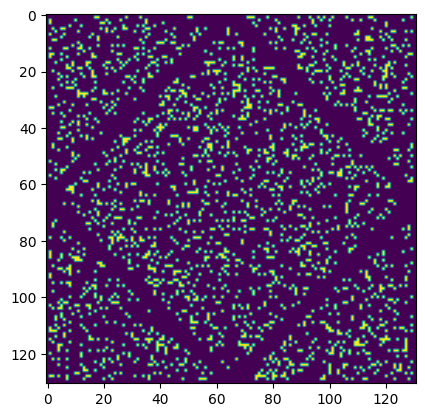

In [8]:
import matplotlib.pyplot as plt
import numpy as np

H = np.zeros((R, C))

for r in range(R):
    for c in range(C):
        if G[r][c] == "#":
            H[r][c] = 255

plt.imshow(H)

In [37]:
from collections import deque

# There is always a path out of the square in 65 steps.
# After enough steps, each board is in one of two states (42 or 39 squares ON)


# x =

test = """...........
.....###.#.
.###.##..#.
..#.#...#..
....#.#....
.##..S####.
.##..#...#.
.......##..
.##.#.####.
.##..##.##.
...........
"""

lines, G, R, C = use_input(aoc)

found = False

for r, row in enumerate(G):
    for c, col in enumerate(row):
        if col == "S":
            s_r = r
            s_c = c
            G[s_r][s_c] = "."
            found = True
            break
    if found:
        break


def take_step(t_r, t_c):
    positions = []
    for d in [[0, 1], [1, 0], [-1, 0], [0, -1]]:
        n_r = (t_r + d[0]) % R
        n_c = (t_c + d[1]) % C
        if 0 <= n_r < R and 0 <= n_c < C and G[n_r][n_c] == ".":
            positions.append((n_r, n_c))
    return tuple(positions)


def f(x):
    visited = {(s_r, s_c)}
    ans = set()

    q = deque([(s_r, s_c, x)])

    # for i in range(x):
    while q:
        t_r, t_c, s = q.popleft()

        if s % 2 == 0:
            ans.add((t_r, t_c))
        if s == 0:
            continue

        for d in [[0, 1], [1, 0], [-1, 0], [0, -1]]:
            n_r = t_r + d[0]
            n_c = t_c + d[1]
            if G[n_r % R][n_c % C] == "." and not (n_r, n_c) in visited:
                # positions.append((n_r, n_c))
                visited.add((n_r, n_c))
                q.append((n_r, n_c, s - 1))

    # print(ans)
    return len(ans)


print(f(64))
# assert False

# 26501365 steps.


# grows equally in each direction. (ok because blank lines).

# work out how many you can reach with total steps % grid size * 2

# f(x) = places you can reach with x steps.

# f( x + 2 * grid_size)
# f(x + 4s)
# f(x + 8s)...
# f(x + 2.n.s)

steps = 26501365
size = R

x = [steps % (2 * size)]
y = []
while True:
    y.append(f(x[-1]))
    x.append(x[-1] + 2 * size)
    if len(y) == 3:
        break

print(x, y)

from sympy import symbols, Eq, solve


def find_quadratic_coefficients(points):
    x, a, b, c = symbols("x a b c")

    equations = [Eq(a * x**2 + b * x + c, y) for x, y in points]
    coefficients = solve(equations, (a, b, c))

    return coefficients


# Example usage with three points (x1, y1), (x2, y2), (x3, y3)
# points = [(1, 2), (2, 3), (3, 5)]
points = list(zip(x[:-1], y))
print(points)
coefficients = find_quadratic_coefficients(points)

print(coefficients)

spaces = 0

for i, v in enumerate(coefficients.values()):
    spaces += v * steps ** (2 - i)

print(spaces)

3666
[65, 327, 589, 851] [3752, 93252, 301856]
[(65, 3752), (327, 93252), (589, 301856)]
{a: 14888/17161, b: 26154/17161, c: -213738/17161}
dict_keys([a, b, c])
609298746763952
